In [6]:
!pyreverse -o png ../urbanscales/preprocessing

Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
parsing ../urbanscales/preprocessing/__init__.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/tile.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/smart_truncate_gpd.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/__init__.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/prep_network.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/train_data.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/prep_speed.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/cache/__init__.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/speed_data/__init__.py...
parsing /Users/nishant/Documents/GitHub/WCS/urbanscales/preprocessing/speed_data/Singapore/__init__.py...
parsing /Users/nishant/Documents/GitHub/W

In [2]:
2 +4

6

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


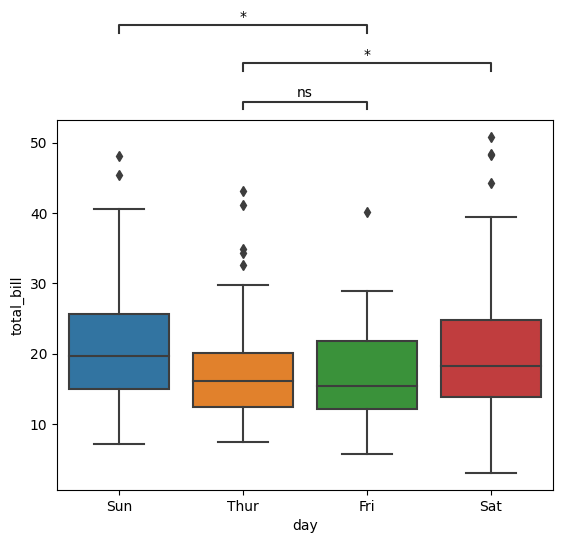

In [8]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)

annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

In [9]:
annot._get_custom_results

Before hardcoding pvalue thresholds 
Dict: annot.get_configuration()["pvalue_format"]
Key: Value


{'correction_format': '{star} ({suffix})',
 'fontsize': 'medium',
 'pvalue_format_string': '{:.3e}',
 'pvalue_thresholds': [[0.0001, '****'],
                       [0.001, '***'],
                       [0.01, '**'],
                       [0.05, '*'],
                       [1, 'ns']],
 'show_test_name': True,
 'simple_format_string': '{:.2f}',
 'text_format': 'star'}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 2.00e-01 < p <= 6.00e-01
      **: 3.00e-02 < p <= 2.00e-01
     ***: 1.00e-02 < p <= 3.00e-02
    ****: p <= 1.00e-02

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02
After hardcoding pvalue thresholds 
Dict: annot.get_configuration()["pvalue_format"]
Key: Value


{'correction_format': '{star} ({suffix})',
 'fontsize': 'medium',
 'pvalue_format_string': '{:.3e}',
 'pvalue_thresholds': [[0.01, '****'],
                       [0.03, '***'],
                       [0.2, '**'],
                       [0.6, '*'],
                       [1, 'ns']],
 'show_test_name': True,
 'simple_format_string': '{:.2f}',
 'text_format': 'star'}

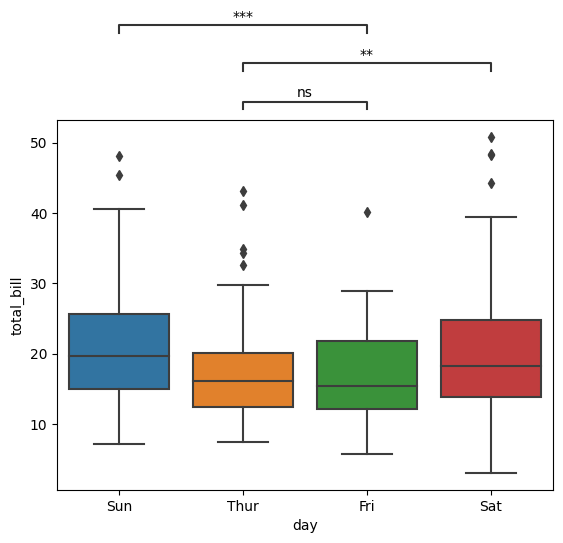

In [51]:
! pip install smartprint

from smartprint import smartprint as sprint
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)

print ("Before hardcoding pvalue thresholds ")
sprint (annot.get_configuration()["pvalue_format"])

annot._pvalue_format.pvalue_thresholds =  [[0.01, '****'], [0.03, '***'], [0.2, '**'], [0.6, '*'], [1, 'ns']]
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

print ("After hardcoding pvalue thresholds ")
sprint (annot.get_configuration()["pvalue_format"])

In [43]:
annot._pvalue_format.pvalue_thresholds =  [[0.0003, '****'], [0.01, '***'], [0.1, '**'], [0.5, '*'], [1, 'ns']]

AttributeError: 'dict' object has no attribute 'get_configuration'